In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# 1. Data Cleaning

In [7]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".", "")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".", "")

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.rename(columns={"Production (Tons)":"Production(Tons)"}, inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"}, inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace=True)

In [10]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [12]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [13]:
df=df.dropna().reset_index()

In [14]:
df.isna().sum()

index                        0
Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [15]:
df=df.drop(["index", "Unnamed: 0"], axis=1)

In [16]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,India,Asia,348448000,260721,4950000,"70393,5"
2,China,Asia,123059739,88287,1675215,"73459,1"
3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,Pakistan,Asia,65450704,324219,1130820,57879


In [17]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [18]:
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].str.replace(",", "")
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].str.replace(",", "")

In [19]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [20]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [21]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# 2. Univariate Analysis

In [23]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


### How many countries produce sugarcane from each continent

In [25]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

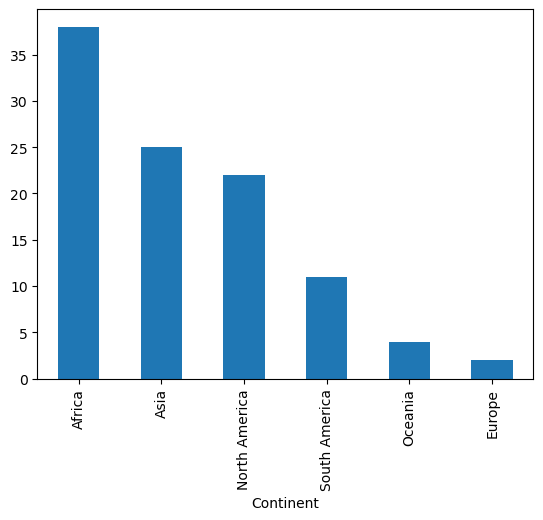

In [26]:
df["Continent"].value_counts().plot(kind="bar")

### Distribution of the columns

C:\Users\rishi\AppData\Local\Temp\ipykernel_16932\1097305459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\rishi\AppData\Local\Temp\ipykernel_16932\1097305459.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\rish

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

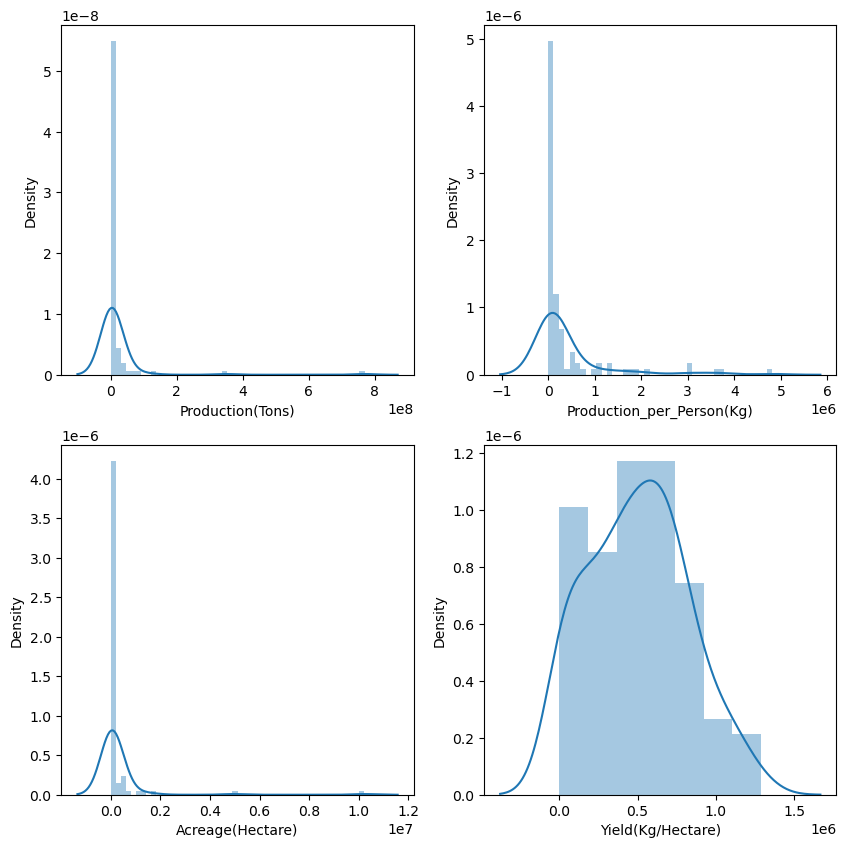

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

### Checking Outliers

<Axes: ylabel='Yield(Kg/Hectare)'>

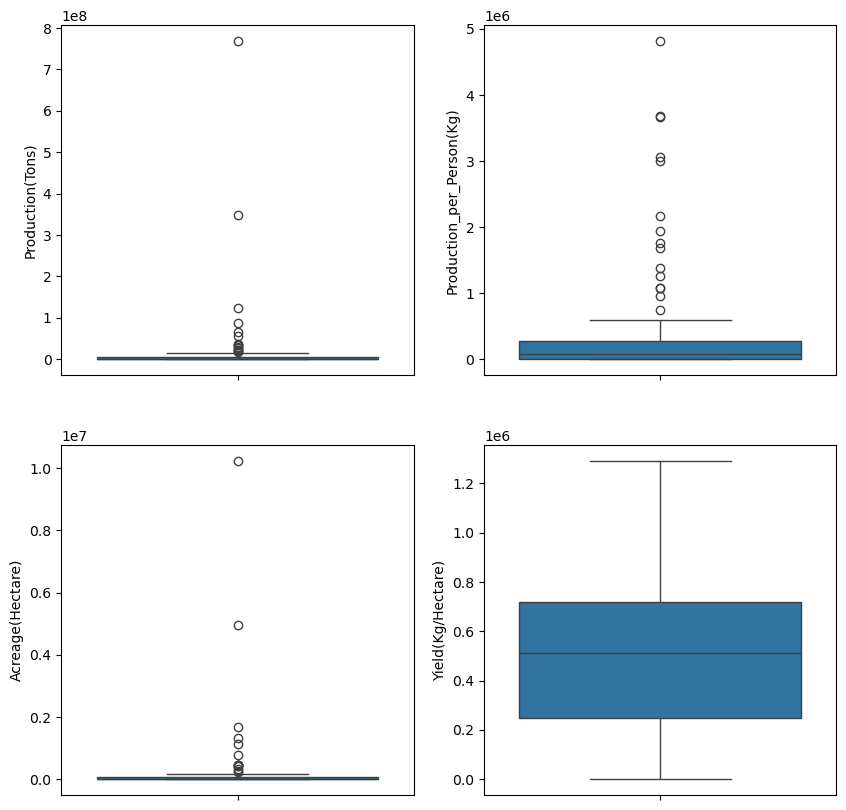

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [31]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# 3. Bivariate Analysis

In [33]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


## ANALYSIS FOR COUNTRY:

### Which country produces maximum sugercane?

In [35]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [36]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [37]:
df_new["Production(Tons)_percent"]=(df_new["Production(Tons)"] * 100)/df_new["Production(Tons)"].sum()

In [38]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

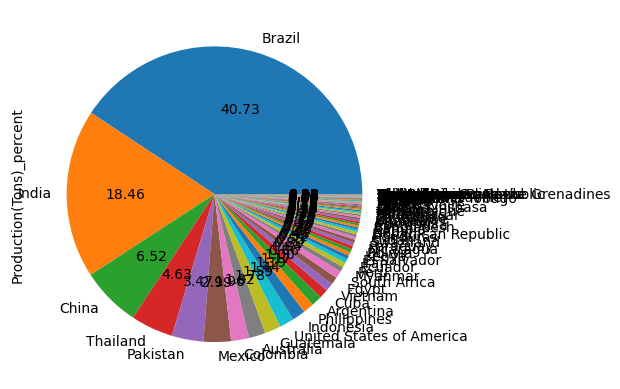

In [39]:
df_new["Production(Tons)_percent"].plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

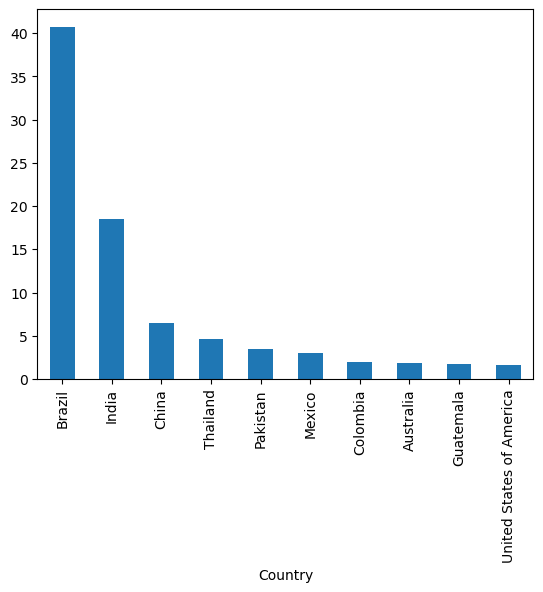

In [40]:
df_new["Production(Tons)_percent"].head(10).plot(kind="bar")

### Which country has highest acreage per hectare?

C:\Users\rishi\AppData\Local\Temp\ipykernel_16932\1824429661.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


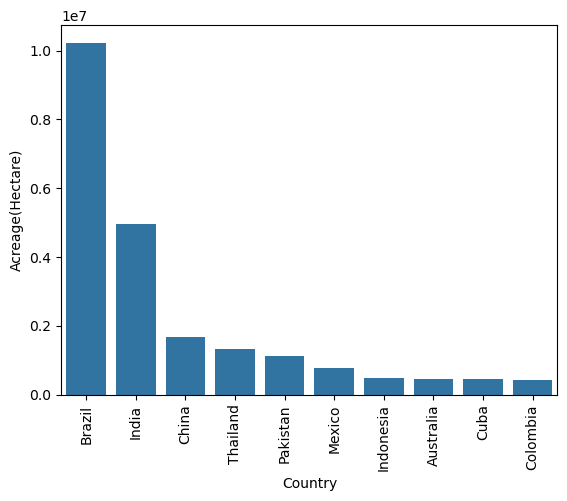

In [83]:
df_acr=df.sort_values(by="Acreage(Hectare)", ascending=False)
ax=sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which country has highest yield per hectare?

C:\Users\rishi\AppData\Local\Temp\ipykernel_16932\4019866150.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


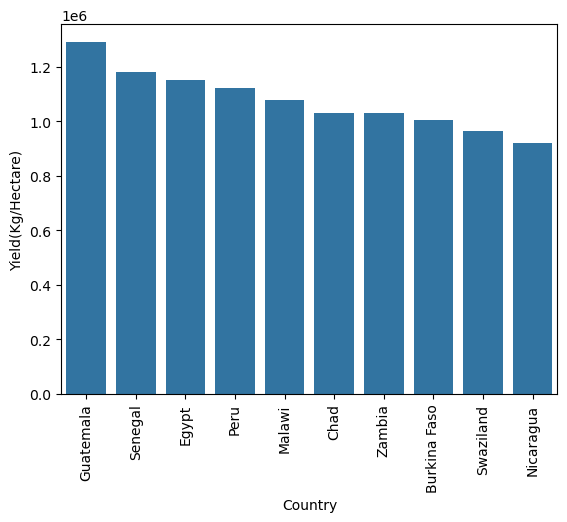

In [87]:
df_yield=df.sort_values(by="Yield(Kg/Hectare)", ascending=False)
ax=sns.barplot(data=df_yield.head(10), x="Country", y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which country has highest production per person?

C:\Users\rishi\AppData\Local\Temp\ipykernel_16932\3127388042.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Swaziland'),
 Text(1, 0, 'Belize'),
 Text(2, 0, 'Brazil'),
 Text(3, 0, 'Guyana'),
 Text(4, 0, 'Mauritius'),
 Text(5, 0, 'Saint Kitts and Nevis'),
 Text(6, 0, 'Guatemala'),
 Text(7, 0, 'Fiji'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Australia')]

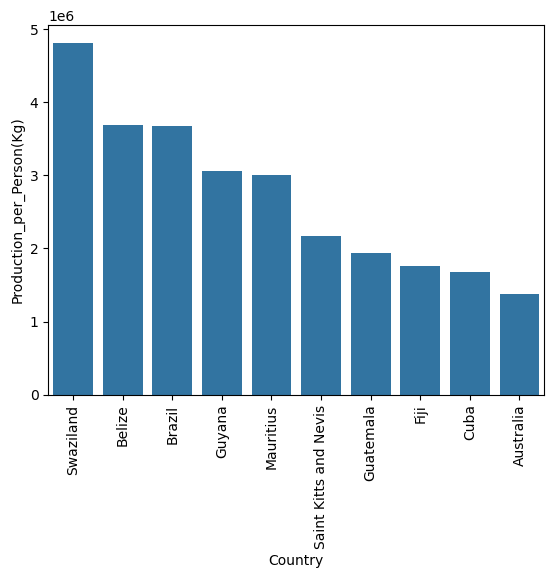

In [106]:
df_ppp=df.sort_values("Production_per_Person(Kg)", ascending=False)
ax= sns.barplot(data=df_ppp.head(10), x="Country", y="Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 4.Correlation

In [111]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [119]:
df_num=df[["Production(Tons)","Production_per_Person(Kg)", "Acreage(Hectare)", "Yield(Kg/Hectare)"]]
df_num.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production_per_Person(Kg),0.352369,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000


### in corr() 
- if closer to 0, not at all related
- if closer to -1, negatively correlated
- if closer to 1, positively correlated

### Do countries with highest land produce more sugarcane?

<Axes: >

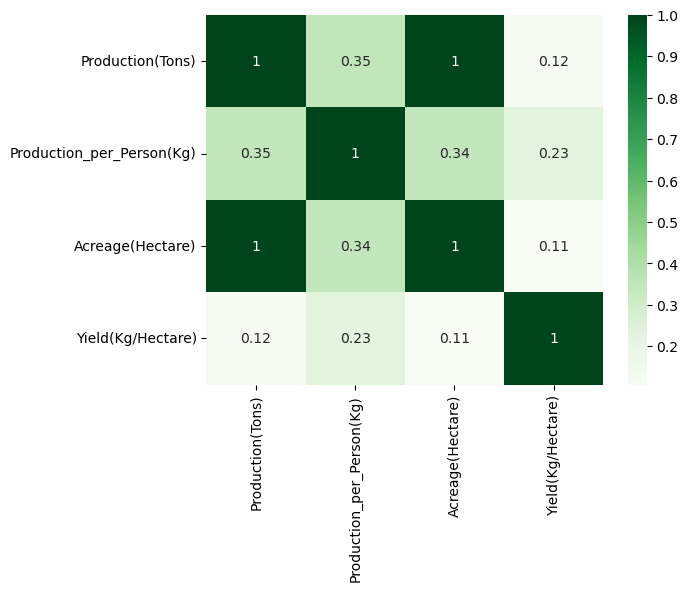

In [126]:
sns.heatmap(df_num.corr(), annot=True, cmap="Greens")

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

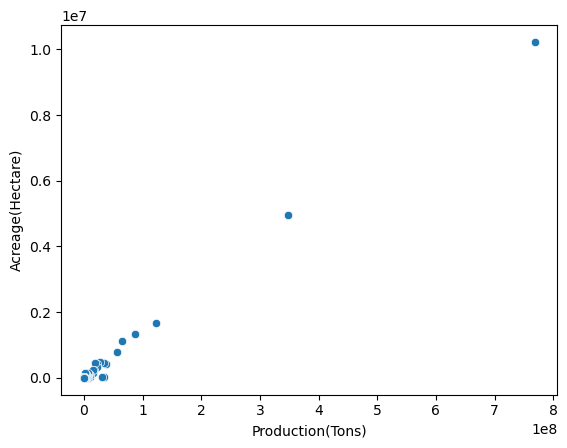

In [129]:
sns.scatterplot(data=df, x="Production(Tons)", y="Acreage(Hectare)")

### Do countries which yield more sugarcane per hectare produce more sugarcane in total?

<Axes: xlabel='Production(Tons)', ylabel='Yield(Kg/Hectare)'>

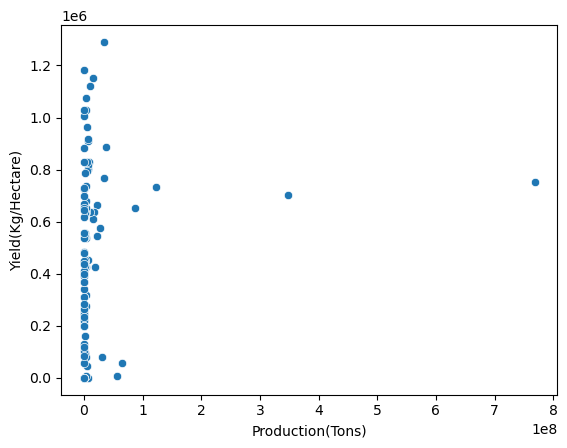

In [132]:
sns.scatterplot(data=df, x="Production(Tons)", y="Yield(Kg/Hectare)")

## ANALYSIS FOR CONTINENT:

In [137]:
df.head(15)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0


### Which continent produces maximum sugarcane?

In [153]:
df_cont=df.groupby("Continent").sum()
df_cont.drop(["Country"], axis=1, inplace= True)
df_cont

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,10144110.0,1439089.0,20700454.0
Asia,721930425.0,3120808.0,10608319.0,11197308.0
Europe,5823.0,536.0,71.0,1318709.0
North America,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,36177574.0,3158066.0,490909.0,1624191.0
South America,865588126.0,10228540.0,11369236.0,6766896.0


<Axes: xlabel='Continent', ylabel='Production(Tons)'>

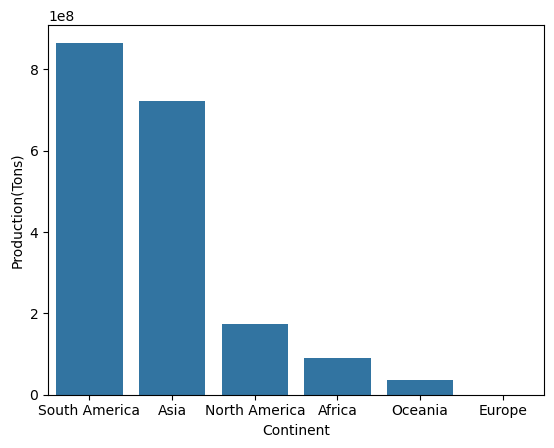

In [167]:
df_cont=df_cont.sort_values(by="Production(Tons)", ascending=False)
sns.barplot(data=df_cont, x="Continent", y="Production(Tons)")

### Which continent has maximum land for production?

<Axes: xlabel='Continent', ylabel='Acreage(Hectare)'>

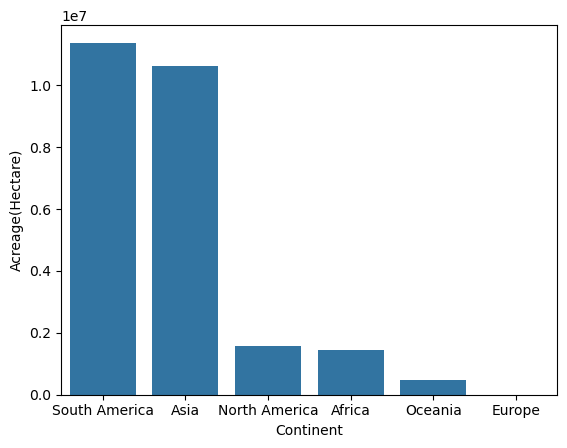

In [170]:
df_cont=df_cont.sort_values(by="Acreage(Hectare)", ascending=False)
sns.barplot(data=df_cont, x="Continent", y="Acreage(Hectare)")

### Do number of countries in a continent affect production of sugarcane?

In [180]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [198]:
df_cont["no_of_countries"]=df.groupby("Continent").count()["Country"]
df_cont

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Continent,,,,,
South America,865588126.0,10228540.0,11369236.0,6766896.0,11
Asia,721930425.0,3120808.0,10608319.0,11197308.0,25
North America,173995947.0,15420953.0,1581983.0,9581162.0,22
Africa,89681472.0,10144110.0,1439089.0,20700454.0,38
Oceania,36177574.0,3158066.0,490909.0,1624191.0,4
Europe,5823.0,536.0,71.0,1318709.0,2


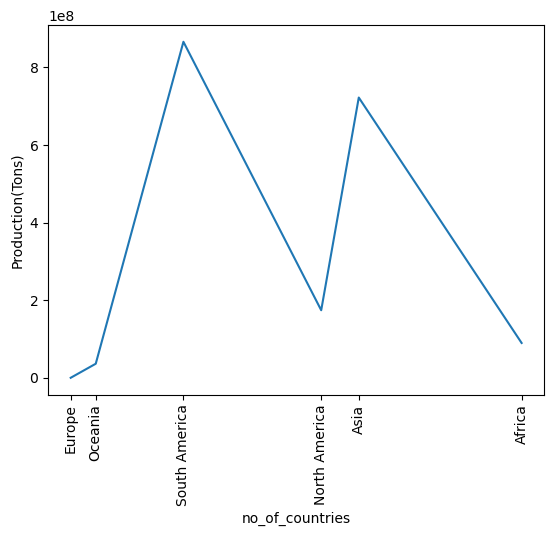

In [203]:
cont_names=df_cont.index.to_list()
ax=sns.lineplot(data=df_cont, x="no_of_countries", y="Production(Tons)")
plt.xticks(df_cont["no_of_countries"], cont_names, rotation=90)
plt.show()

### Correlation for continent

In [207]:
df_cont.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Production(Tons),1.000000,0.143100,0.994897,0.104312,0.109244
Production_per_Person(Kg),0.143100,1.000000,0.073059,0.514924,0.526387
Acreage(Hectare),0.994897,0.073059,1.000000,0.126764,0.132817
Yield(Kg/Hectare),0.104312,0.514924,0.126764,1.000000,0.983807
no_of_countries,0.109244,0.526387,0.132817,0.983807,1.000000


### Do continents with highest land produces more sugarcane?

<Axes: ylabel='Production(Tons)'>

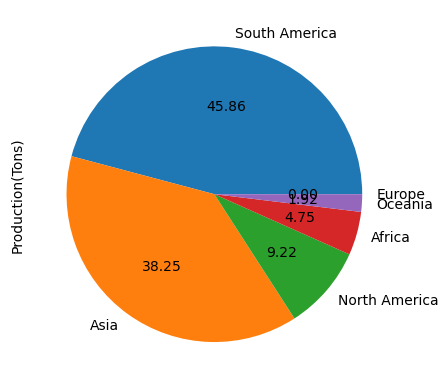

In [218]:
df_cont["Production(Tons)"].plot(kind="pie", autopct="%.2f")